In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df

,Date,Time,Group,Gas
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [22]:
df = df.drop('Time', axis=1)
grouped = df.groupby(by=['Group', 'Date'], as_index=False).sum()
grouped

,Group,Date,Gas
0,A,2013-01-01,60125.336
1,A,2013-01-02,74236.328
2,A,2013-01-03,79286.400
3,A,2013-01-04,78593.528
4,A,2013-01-05,69657.336
...,...,...,...
15332,H,2018-12-27,14644.174
15333,H,2018-12-28,15598.189
15334,H,2018-12-29,14642.864
15335,H,2018-12-30,14019.426


In [23]:
a = grouped[grouped['Group']=='A']
b = grouped[grouped['Group']=='B']
c = grouped[grouped['Group']=='C']
d = grouped[grouped['Group']=='D']
e = grouped[grouped['Group']=='E']
g = grouped[grouped['Group']=='G']
h = grouped[grouped['Group']=='H']

a = a.drop('Group', axis=1)
b = b.drop('Group', axis=1)
c = c.drop('Group', axis=1)
d = d.drop('Group', axis=1)
e = e.drop('Group', axis=1)
g = g.drop('Group', axis=1)
h = h.drop('Group', axis=1)

a

,Date,Gas
0,2013-01-01,60125.336
1,2013-01-02,74236.328
2,2013-01-03,79286.400
3,2013-01-04,78593.528
4,2013-01-05,69657.336
...,...,...
2186,2018-12-27,67035.917
2187,2018-12-28,72333.214
2188,2018-12-29,64691.667
2189,2018-12-30,62262.258


In [24]:
a['Date'] = pd.to_datetime(a['Date'])
a.index = a['Date']
a.set_index('Date', inplace=True)
a

,Gas
Date,
2013-01-01,60125.336
2013-01-02,74236.328
2013-01-03,79286.400
2013-01-04,78593.528
2013-01-05,69657.336
...,...
2018-12-27,67035.917
2018-12-28,72333.214
2018-12-29,64691.667


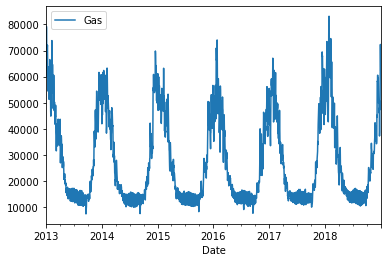

In [5]:
a.plot()
plt.show()

In [6]:
a_train = a[:2100]
a_test = a[2100:]
b_train = b[:2100]
b_test = b[2100:]
c_train = c[:2100]
c_test = c[2100:]
d_train = d[:2100]
d_test = d[2100:]
e_train = e[:2100]
e_test = e[2100:]
g_train = g[:2100]
g_test = g[2100:]
h_train = h[:2100]
h_test = h[2100:]

a_train, a_test

(                  Gas
 Date                 
 2013-01-01  60125.336
 2013-01-02  74236.328
 2013-01-03  79286.400
 2013-01-04  78593.528
 2013-01-05  69657.336
 ...               ...
 2018-09-27  16338.897
 2018-09-28  16736.362
 2018-09-29  14326.895
 2018-09-30  13284.708
 2018-10-01  16918.442
 
 [2100 rows x 1 columns],
                   Gas
 Date                 
 2018-10-02  17823.759
 2018-10-03  16495.597
 2018-10-04  17352.374
 2018-10-05  18113.863
 2018-10-06  16725.119
 ...               ...
 2018-12-27  67035.917
 2018-12-28  72333.214
 2018-12-29  64691.667
 2018-12-30  62262.258
 2018-12-31  66439.615
 
 [91 rows x 1 columns])

In [7]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(a_train.Gas.values, order=(2,0,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2100
Model:                     ARMA(2, 2)   Log Likelihood              -19749.166
Method:                       css-mle   S.D. of innovations           2935.027
Date:                Tue, 30 Nov 2021   AIC                          39510.331
Time:                        00:48:22   BIC                          39544.229
Sample:                             0   HQIC                         39522.747
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.768e+04   7326.784      3.777      0.000    1.33e+04     4.2e+04
ar.L1.y        1.4603      0.038     38.337      0.000       1.386       1.535
ar.L2.y       -0.4627      0.038    -12.248      0.0

<AxesSubplot:>

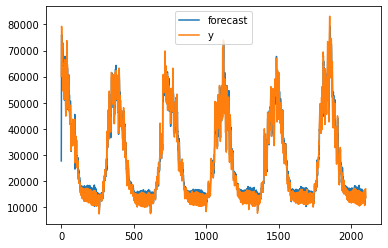

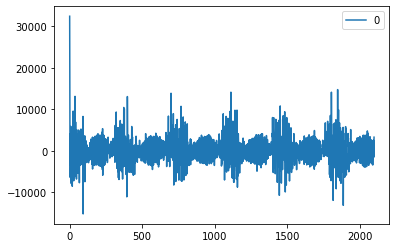

In [8]:
fig = model_fit.plot_predict()
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

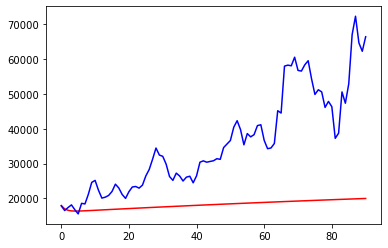

In [9]:
forecast_data = model_fit.forecast(steps=91)

pred_y = forecast_data[0].tolist()
test_y = a_test.Gas.values

plt.plot(pred_y, color="red")
plt.plot(test_y, color="blue")

In [17]:
import warnings
warnings.filterwarnings('ignore')

from pmdarima import auto_arima
stepwise_model = auto_arima(a_train, start_p=1, d=1, start_q=1, max_p=2, max_q=2,
                            start_P=0, D=1, m=12, seasonal=True, error_action='ignore', trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=41420.872, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=40485.366, Time=2.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.46 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=41375.400, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=40197.108, Time=4.89 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.55 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=40259.352, Time=1.00 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=40195.215, Time=2.23 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=40337.068, Time=1.19 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=10.69 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.03 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=39918.393, Time=10.65 sec
 ARIMA(2,1,1)(1,1,0)[12]             : 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
<ipython-input-10-244ccf9d729d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_test['SeasonalARIMA'] = SARIMA_predict_day


<AxesSubplot:xlabel='Date'>

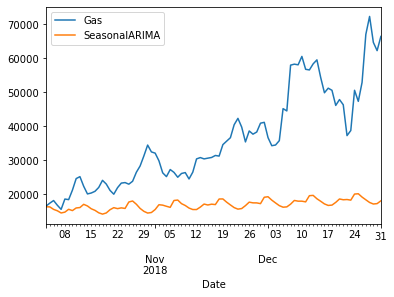

In [10]:
SARIMADay = sm.tsa.statespace.SARIMAX(a_train, order=(1, 1, 2), seasonal_order=(2, 1, 0, 12) ,enforce_stationarity=False,enforce_invertibility=False)

SARIMA_results_day = SARIMADay.fit()


SARIMA_predict_day = SARIMA_results_day.predict(start=2100,end=2191)
a_test['SeasonalARIMA'] = SARIMA_predict_day
a_test[1:].plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
<ipython-input-11-75191fb1ed7c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_test['SeasonalARIMA'] = SARIMA_predict_day


<AxesSubplot:xlabel='Date'>

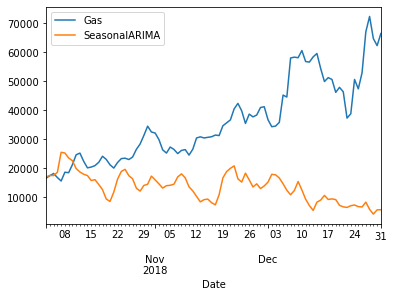

In [11]:
SARIMADay = sm.tsa.statespace.SARIMAX(a_train, order=(1, 1, 2), seasonal_order=(2, 1, 0, 100) ,enforce_stationarity=False,enforce_invertibility=False)

SARIMA_results_day = SARIMADay.fit()


SARIMA_predict_day = SARIMA_results_day.predict(start=2100,end=2191)
a_test['SeasonalARIMA'] = SARIMA_predict_day
a_test[1:].plot()

In [13]:
'''
SARIMADay = sm.tsa.statespace.SARIMAX(a_train, order=(1, 1, 2), seasonal_order=(2, 1, 0, 365) ,enforce_stationarity=False,enforce_invertibility=False)

SARIMA_results_day = SARIMADay.fit()


SARIMA_predict_day = SARIMA_results_day.predict(start=2100,end=2191)
a_test['SeasonalARIMA'] = SARIMA_predict_day
a_test[1:].plot()
'''

"\nSARIMADay = sm.tsa.statespace.SARIMAX(a_train, order=(1, 1, 2), seasonal_order=(2, 1, 0, 365) ,enforce_stationarity=False,enforce_invertibility=False)\n\nSARIMA_results_day = SARIMADay.fit()\n\n\nSARIMA_predict_day = SARIMA_results_day.predict(start=2100,end=2191)\na_test['SeasonalARIMA'] = SARIMA_predict_day\na_test[1:].plot()\n"

In [81]:
#XGBOOST

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier

df = pd.read_csv('data.csv')
df = df.drop('Time', axis=1)
grouped = df.groupby(by=['Group', 'Date'], as_index=False).sum()

a = grouped[grouped['Group']=='A']
b = grouped[grouped['Group']=='B']
c = grouped[grouped['Group']=='C']
d = grouped[grouped['Group']=='D']
e = grouped[grouped['Group']=='E']
g = grouped[grouped['Group']=='G']
h = grouped[grouped['Group']=='H']

a = a.drop('Group', axis=1)
b = b.drop('Group', axis=1)
c = c.drop('Group', axis=1)
d = d.drop('Group', axis=1)
e = e.drop('Group', axis=1)
g = g.drop('Group', axis=1)
h = h.drop('Group', axis=1)

a['Date'] = pd.to_datetime(a['Date'])
a.index = a['Date']
a.set_index('Date', inplace=True)
a

,Gas
Date,
2013-01-01,60125.336
2013-01-02,74236.328
2013-01-03,79286.400
2013-01-04,78593.528
2013-01-05,69657.336
...,...
2018-12-27,67035.917
2018-12-28,72333.214
2018-12-29,64691.667


In [82]:
a['Day'] = a.index.day
a['Month'] = a.index.month
a['Year'] = a.index.year
a['Dayofweek'] = a.index.dayofweek
a

,Gas,Day,Month,Year,Dayofweek
Date,,,,,
2013-01-01,60125.336,1,1,2013,1
2013-01-02,74236.328,2,1,2013,2
2013-01-03,79286.400,3,1,2013,3
2013-01-04,78593.528,4,1,2013,4
2013-01-05,69657.336,5,1,2013,5
...,...,...,...,...,...
2018-12-27,67035.917,27,12,2018,3
2018-12-28,72333.214,28,12,2018,4
2018-12-29,64691.667,29,12,2018,5


In [83]:
a_train = a[:2100]
a_test = a[2100:]
b_train = b[:2100]
b_test = b[2100:]
c_train = c[:2100]
c_test = c[2100:]
d_train = d[:2100]
d_test = d[2100:]
e_train = e[:2100]
e_test = e[2100:]
g_train = g[:2100]
g_test = g[2100:]
h_train = h[:2100]
h_test = h[2100:]

a_train, a_test

(                  Gas  Day  Month  Year  Dayofweek
 Date                                              
 2013-01-01  60125.336    1      1  2013          1
 2013-01-02  74236.328    2      1  2013          2
 2013-01-03  79286.400    3      1  2013          3
 2013-01-04  78593.528    4      1  2013          4
 2013-01-05  69657.336    5      1  2013          5
 ...               ...  ...    ...   ...        ...
 2018-09-27  16338.897   27      9  2018          3
 2018-09-28  16736.362   28      9  2018          4
 2018-09-29  14326.895   29      9  2018          5
 2018-09-30  13284.708   30      9  2018          6
 2018-10-01  16918.442    1     10  2018          0
 
 [2100 rows x 5 columns],
                   Gas  Day  Month  Year  Dayofweek
 Date                                              
 2018-10-02  17823.759    2     10  2018          1
 2018-10-03  16495.597    3     10  2018          2
 2018-10-04  17352.374    4     10  2018          3
 2018-10-05  18113.863    5     10  

In [84]:
a_train_y = a_train.loc[:,'Gas']
a_train_x = a_train.drop('Gas', axis=1)
a_test_y = a_test.loc[:,'Gas']
a_test_x = a_test.drop('Gas', axis=1)

a_train_y, a_train_x

(Date
 2013-01-01    60125.336
 2013-01-02    74236.328
 2013-01-03    79286.400
 2013-01-04    78593.528
 2013-01-05    69657.336
                 ...    
 2018-09-27    16338.897
 2018-09-28    16736.362
 2018-09-29    14326.895
 2018-09-30    13284.708
 2018-10-01    16918.442
 Name: Gas, Length: 2100, dtype: float64,
             Day  Month  Year  Dayofweek
 Date                                   
 2013-01-01    1      1  2013          1
 2013-01-02    2      1  2013          2
 2013-01-03    3      1  2013          3
 2013-01-04    4      1  2013          4
 2013-01-05    5      1  2013          5
 ...         ...    ...   ...        ...
 2018-09-27   27      9  2018          3
 2018-09-28   28      9  2018          4
 2018-09-29   29      9  2018          5
 2018-09-30   30      9  2018          6
 2018-10-01    1     10  2018          0
 
 [2100 rows x 4 columns])

In [85]:
XG_model = xgb.XGBRegressor(n_estimators=1000)
XG_model.fit(a_train_x, a_train_y, eval_set=[(a_test_x, a_test_y)], early_stopping_rounds=50)

[0]	validation_0-rmse:27766.93164
[1]	validation_0-rmse:20456.23047
[2]	validation_0-rmse:15127.12988
[3]	validation_0-rmse:11564.22461
[4]	validation_0-rmse:9366.72363
[5]	validation_0-rmse:8189.92432
[6]	validation_0-rmse:7587.31006
[7]	validation_0-rmse:7370.09863
[8]	validation_0-rmse:7224.19336
[9]	validation_0-rmse:7207.72607
[10]	validation_0-rmse:7216.19141
[11]	validation_0-rmse:7195.62793
[12]	validation_0-rmse:7290.78174
[13]	validation_0-rmse:7283.66992
[14]	validation_0-rmse:7323.45361
[15]	validation_0-rmse:7352.69678
[16]	validation_0-rmse:7364.62793
[17]	validation_0-rmse:7371.18164
[18]	validation_0-rmse:7391.86816
[19]	validation_0-rmse:7438.45752
[20]	validation_0-rmse:7423.50635
[21]	validation_0-rmse:7475.74365
[22]	validation_0-rmse:7472.21533
[23]	validation_0-rmse:7504.65576
[24]	validation_0-rmse:7512.31250
[25]	validation_0-rmse:7481.01514
[26]	validation_0-rmse:7554.29932
[27]	validation_0-rmse:7583.51367
[28]	validation_0-rmse:7683.54053
[29]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

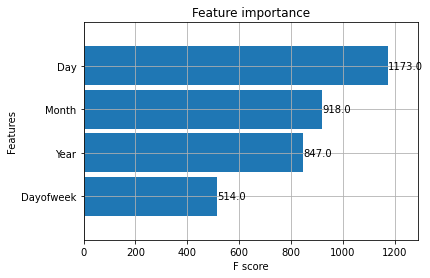

In [86]:
plot_importance(XG_model, height=0.9)

<AxesSubplot:xlabel='Date'>

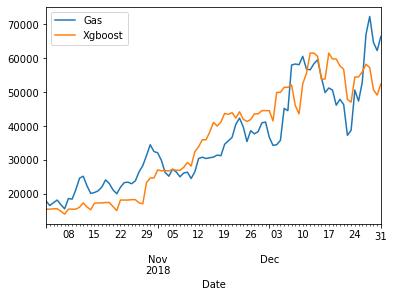

In [87]:
xgboost = XG_model.predict(a_test_x)

result = pd.concat([a_test_y.reset_index(), pd.DataFrame(xgboost, columns=['Xgboost'])], axis=1, ignore_index=False)
result = result.set_index('Date')
result = result.loc[:, ['Gas', 'Xgboost']]
result.plot()

In [88]:
#LSTM

train_x = np.array(a_train_x).reshape(a_train_x.shape[0], a_train_x.shape[1], 1)
test_x = np.array(a_test_x).reshape(a_test_x.shape[0], a_test_x.shape[1], 1)

train_x, test_x

(array([[[   1],
         [   1],
         [2013],
         [   1]],
 
        [[   2],
         [   1],
         [2013],
         [   2]],
 
        [[   3],
         [   1],
         [2013],
         [   3]],
 
        ...,
 
        [[  29],
         [   9],
         [2018],
         [   5]],
 
        [[  30],
         [   9],
         [2018],
         [   6]],
 
        [[   1],
         [  10],
         [2018],
         [   0]]], dtype=int64),
 array([[[   2],
         [  10],
         [2018],
         [   1]],
 
        [[   3],
         [  10],
         [2018],
         [   2]],
 
        [[   4],
         [  10],
         [2018],
         [   3]],
 
        [[   5],
         [  10],
         [2018],
         [   4]],
 
        [[   6],
         [  10],
         [2018],
         [   5]],
 
        [[   7],
         [  10],
         [2018],
         [   6]],
 
        [[   8],
         [  10],
         [2018],
         [   0]],
 
        [[   9],
         [  10],
         [2018]

<AxesSubplot:>

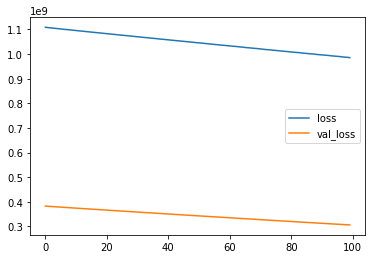

In [89]:
import keras
from keras.layers import Dense
from keras.models import Sequential
#from keras.utils import to_categorical
#from keras.optimizers import SGD,Adadelta,Adam,RMSprop 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

model = keras.Sequential()
model.add(keras.layers.LSTM(units=128,input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_x, a_train_y, validation_split=0.1, batch_size=10, epochs=100, verbose=False)

pd.DataFrame.from_dict(history.history).plot()

<AxesSubplot:>

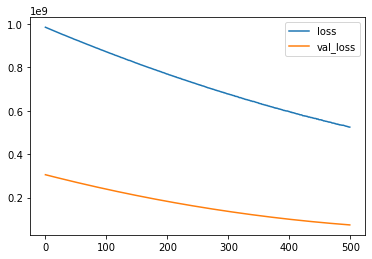

In [90]:
history2 = model.fit(train_x, a_train_y, validation_split=0.1, batch_size=10, epochs=500, verbose=False)

pd.DataFrame.from_dict(history2.history).plot()

<AxesSubplot:xlabel='Date'>

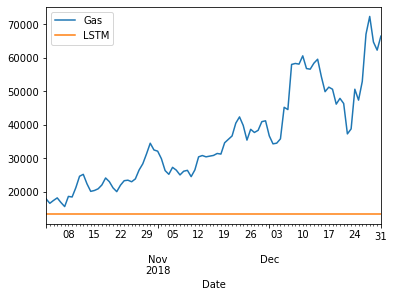

In [94]:
df_test_x = np.array(a_test_x).reshape(a_test_x.shape[0], a_test_x.shape[1], 1)
lstm = model.predict(df_test_x)

result = pd.concat([a_test_y.reset_index(), pd.DataFrame(lstm, columns=['LSTM'])], axis=1, ignore_index=False)
result = result.set_index('Date')
result = result.loc[:, ['Gas', 'LSTM']]
result.plot()